<a href="https://colab.research.google.com/github/Dany511/Netflix_Movies_and_TvShows_Clustering/blob/main/Capstone_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

## **Importing Libraries**

In [104]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from datetime import datetime

from sklearn.cluster import KMeans,AgglomerativeClustering 

# Importing Metrics for model evaluation
from sklearn import metrics
# from sklearn.metrics import 

# To ignore warnings
import warnings    
warnings.filterwarnings('ignore')

## **Loading Data**

In [105]:
# Loading the dataset using pandas read_csv
data=pd.read_csv("/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
# head function gives the preview of the data
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [106]:
#last five rows
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [107]:
# Data shape
data.shape

(7787, 12)

In [108]:
#columns name
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [109]:
# The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [110]:
# Copying the dataset to a dataframe named df.
df=data.copy()

In [111]:
#Drop duplicates 
df.duplicated().value_counts()

False    7787
dtype: int64

### **There are no duplicated records in the dataset**

In [112]:
# Descriptive summary of the dataset
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


## **Handling Null Values**

In [113]:
# Checking the Null values in the dataframe
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### There are 2389 null values in director column, 718 null values in cast column ,507 null values in country column ,10 in date_added and 7 in rating. so we need to handle the null values

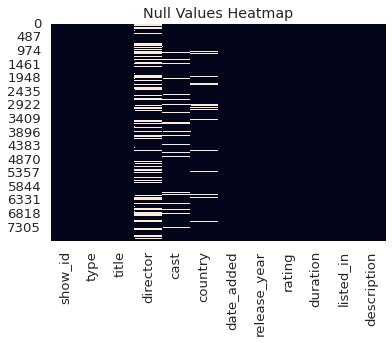

In [114]:
#Visualizing the null values using heatmap
sns.heatmap(df.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [115]:
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [116]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [117]:
df.shape

(7777, 12)

In [118]:
#again checking for null values 
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [119]:
# Choosing the primary country and primary genre to simplify the analysis
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

## **EDA**

### Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task.It involves exploring and analyzing the dataset given to find out patterns, trends and conclusions to take better decisions related to the data.

### **1.Type of content**

In [120]:
#Count of movies and TV shows on netflix
df['type'].value_counts()

Movie      5377
TV Show    2400
Name: type, dtype: int64

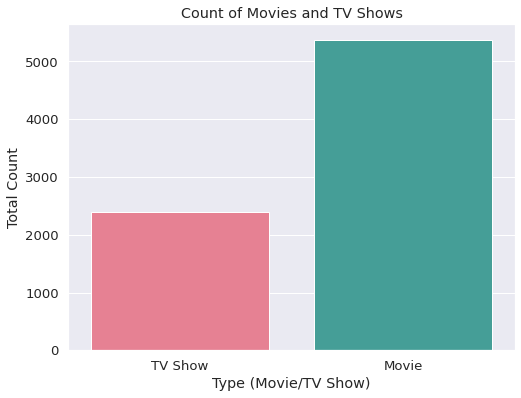

In [121]:
#countplot to visualize the number of movies and tv_shows in type column
plt.figure(figsize=(8,6))
sns.countplot(df['type'],palette="husl")
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

### **2.Ratings**

In [122]:
#Number of Movies and Tv shows with respect to ratings
df['rating'].value_counts()

TV-MA       2868
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [123]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-MA': 'Adults',
    'TV-14': 'Teens',
    'TV-PG': 'Older Kids',
    'R': 'Adults',
    'PG-13': 'Teens',
    'TV-Y': 'Kids',
    'TV-Y7': 'Older Kids',
    'PG': 'Older Kids',
    'TV-G': 'Kids',
    'NR': 'Adults',
    'G': 'Kids',
    'TV-Y7-FV': 'Older Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

In [124]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,Adults
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",Adults
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",Teens
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens


In [125]:
#creating seperate columns for Tv shows and Movies
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

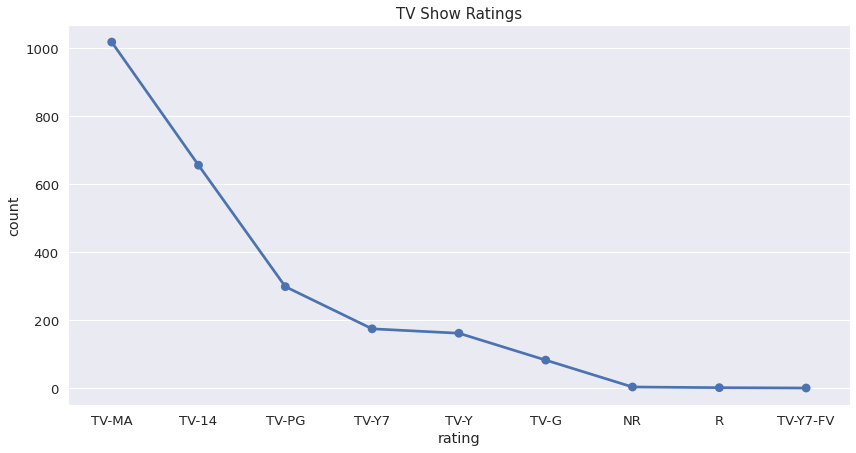

In [126]:
#Rating based on rating system of all TV Shows
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
plt.figure(figsize=(14,7))
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='15')
plt.show()

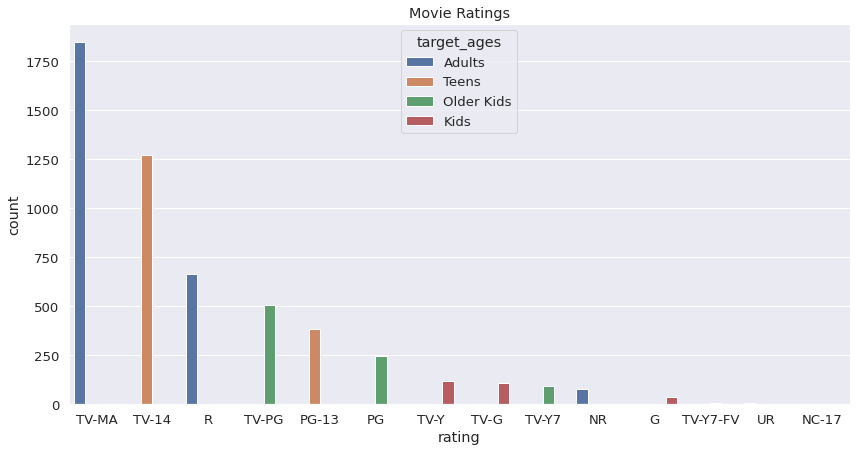

In [127]:
#Movie ratings based on Target age groups
plt.figure(figsize=(14,7))
plt.title('Movie Ratings')
sns.countplot(x=movies['rating'],hue=movies['target_ages'],data=movies,order=movies['rating'].value_counts().index)
plt.show()

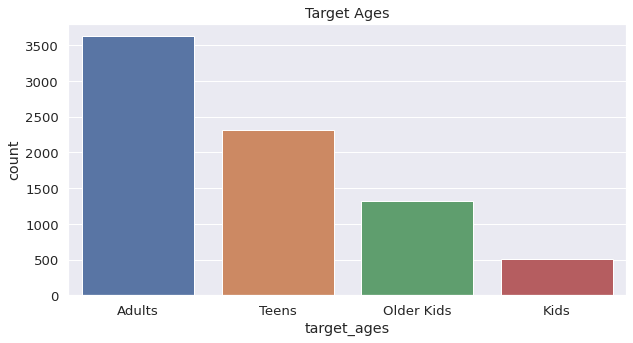

In [128]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='target_ages',data=df)
plt.title("Target Ages")
plt.show()

### **3.Release Year**

In [129]:
#Count of Movies released in each year
movies_year=movies['release_year'].value_counts()

In [130]:
movies_year

2017    744
2018    734
2016    642
2019    582
2020    411
       ... 
1946      1
1963      1
1964      1
1947      1
1959      1
Name: release_year, Length: 72, dtype: int64

In [131]:
#Count of Tv shows released in each year
tvshows_year=tv_shows['release_year'].value_counts()

In [132]:
#tvshows_year

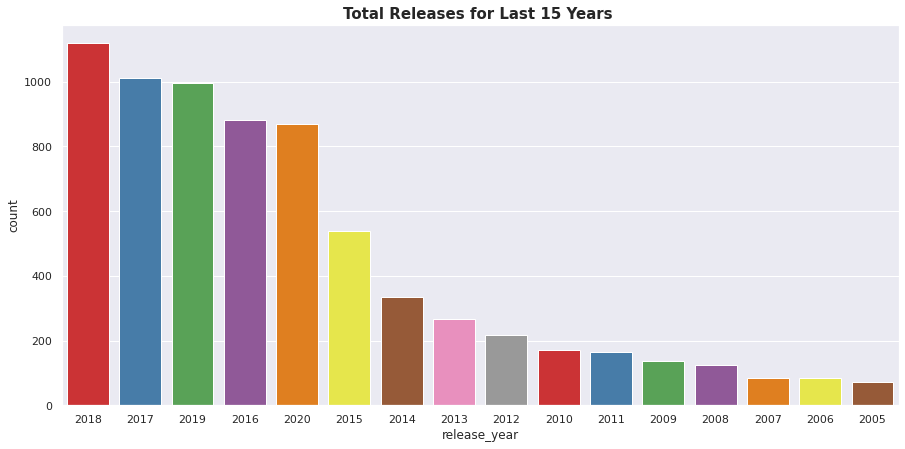

In [133]:
# Total releases for last 15 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(df['release_year'],palette="Set1",order=df['release_year'].value_counts().index[0:16])
plt.title('Total Releases for Last 15 Years ',size='15',fontweight="bold")    
plt.show()

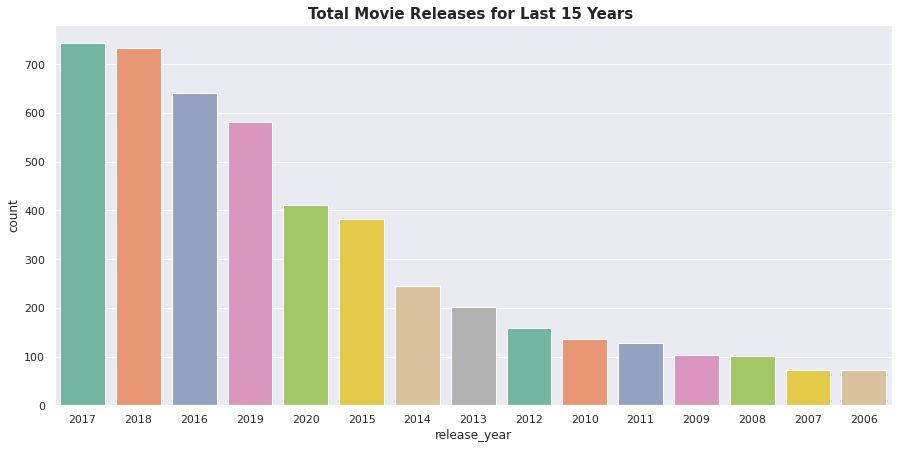

In [134]:
# Total movie releases for last 15 years
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x=movies['release_year'],palette="Set2",order=movies['release_year'].value_counts().index[0:15])
plt.title('Total Movie Releases for Last 15 Years ',size='15',fontweight="bold")    
plt.show()


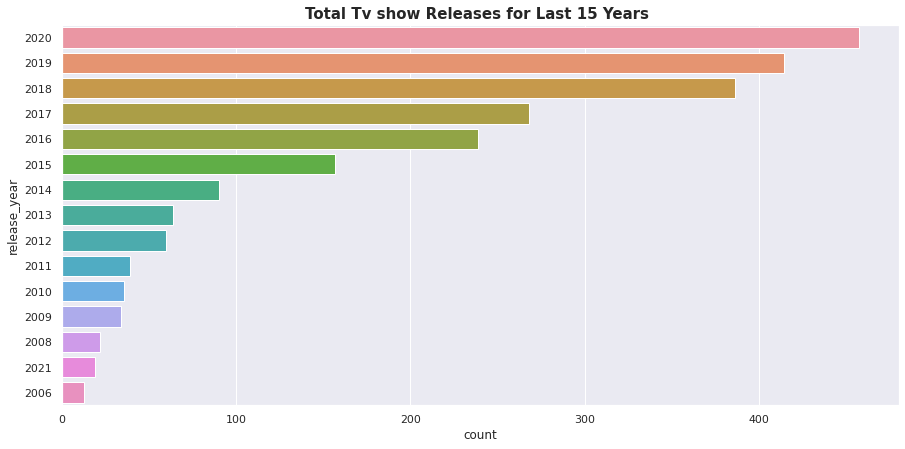

In [135]:
#Analysing how many Tv shows released per year in last 15 years
plt.figure(figsize=(15,7))
plt.title('Total Tv show Releases for Last 15 Years ',size='15',fontweight="bold")  
sns.countplot(y=tv_shows['release_year'],data=df,order=tv_shows['release_year'].value_counts().index[0:15])
plt.show()

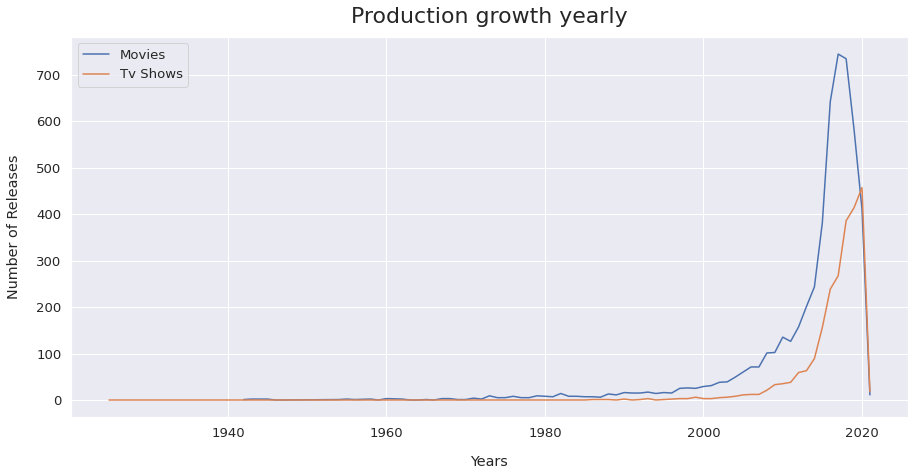

In [136]:
# visualizing the movies and tv_shows based on the release year
sns.set(font_scale=1.2)
sns.lineplot(data=movies_year,label='Movies')
sns.lineplot(data=tvshows_year,label='Tv Shows')
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number of Releases", labelpad=15)
plt.title("Production growth yearly", y=1.02, fontsize=22);

### **4.Monthly-wise Releases**

In [137]:
#adding column of month
df['month'] = pd.DatetimeIndex(df['date_added']).month
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,month
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


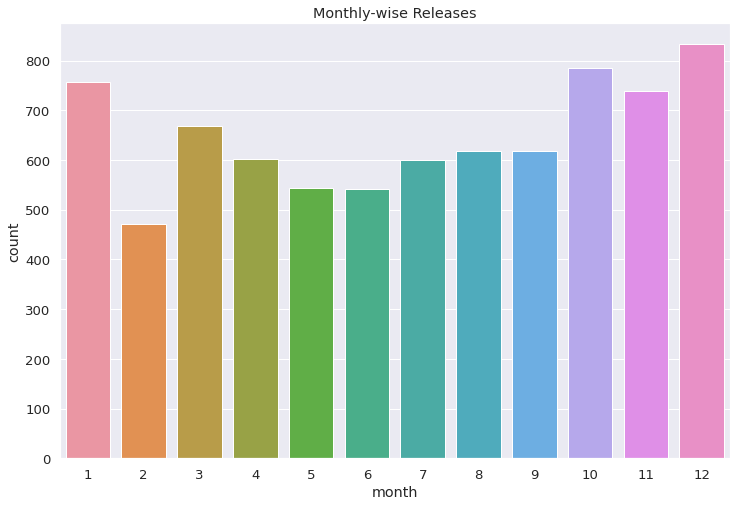

In [138]:
# Monthly-wise releases
plt.figure(figsize=(12,8))
plt.title('Monthly-wise Releases')
sns.countplot('month',data= df)

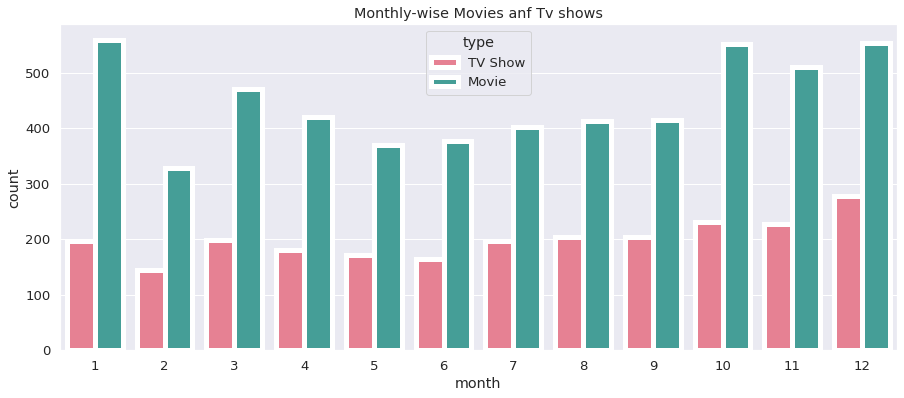

In [139]:
# Monthly-wise Movie and Tv show releases
plt.figure(figsize=(15,6))
plt.title("Monthly-wise Movies anf Tv shows")
sns.countplot(x='month', hue='type',lw=5, data=df,palette='husl')
plt.show()

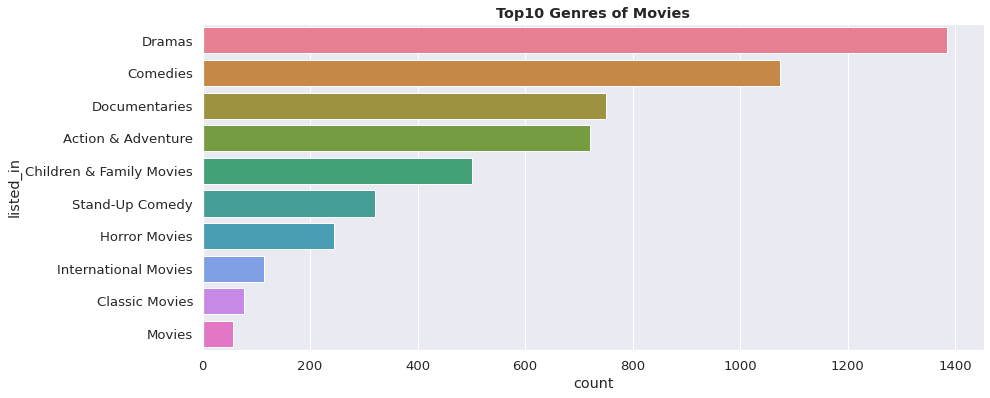

In [140]:
#Analysing top10 genres of the movies
plt.figure(figsize=(14,6))
plt.title('Top10 Genres of Movies',fontweight="bold")
sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10],palette='husl')

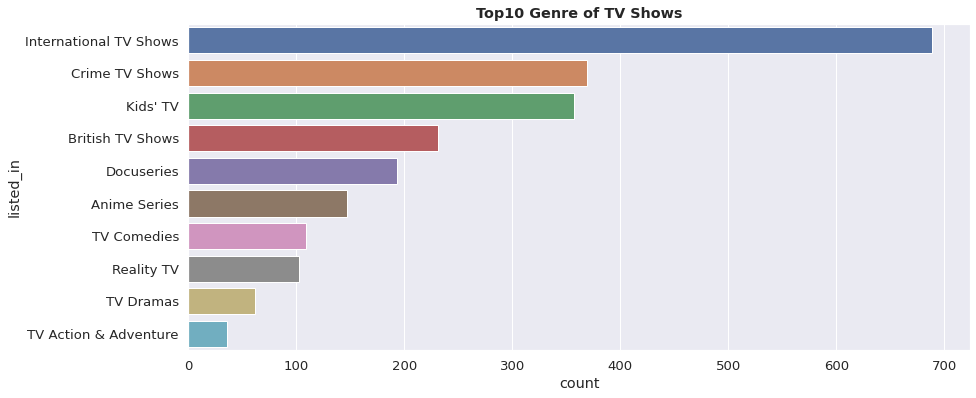

In [141]:
#Analysing top10 genres of TVSHOWS
plt.figure(figsize=(14,6))
plt.title('Top10 Genre of TV Shows',fontweight="bold")
sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10])

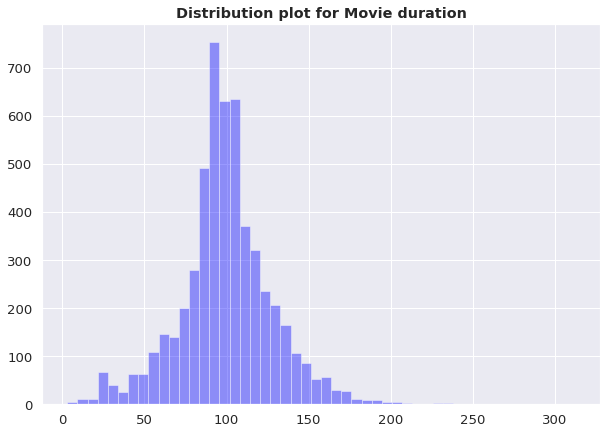

In [142]:
#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at least 1 digit
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['blue'])
plt.title('Distribution plot for Movie duration',fontweight="bold")
plt.show()

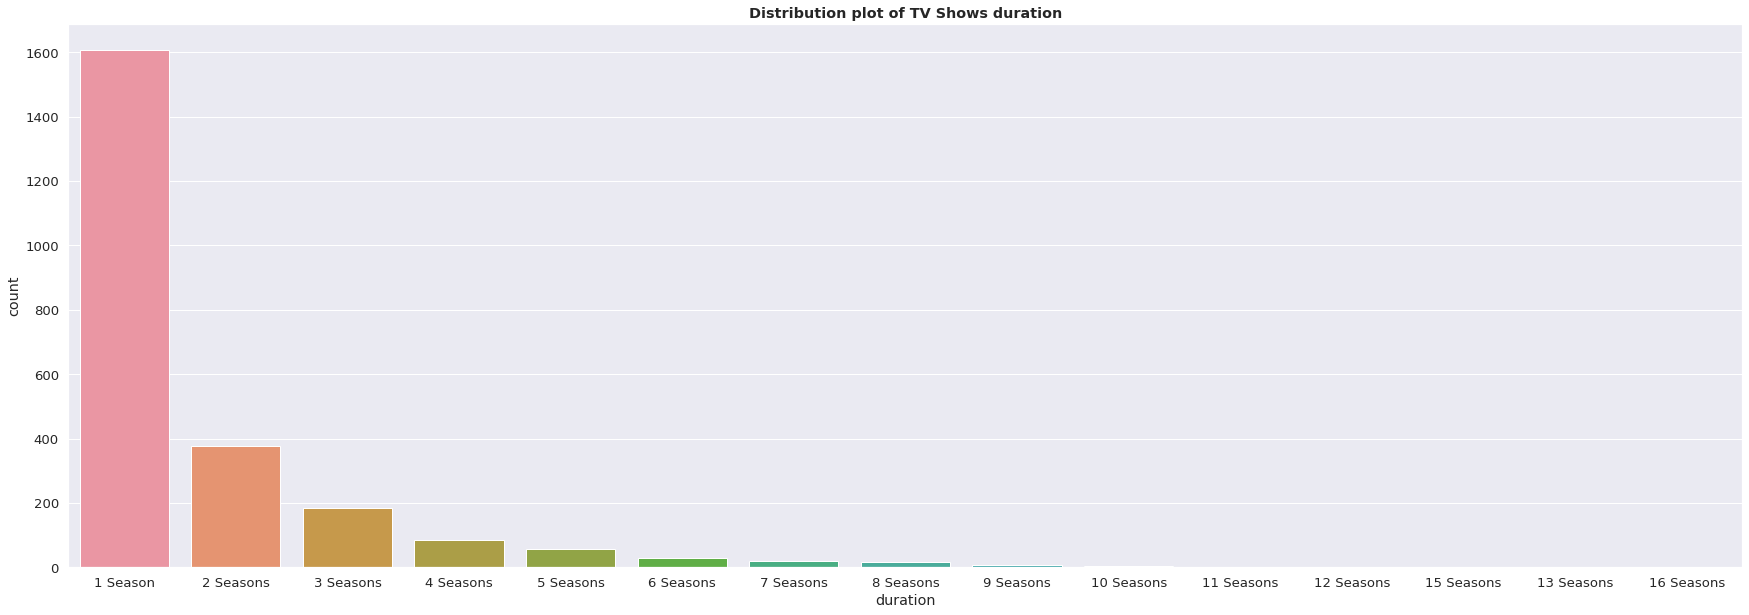

In [143]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,10))
plt.title("Distribution plot of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

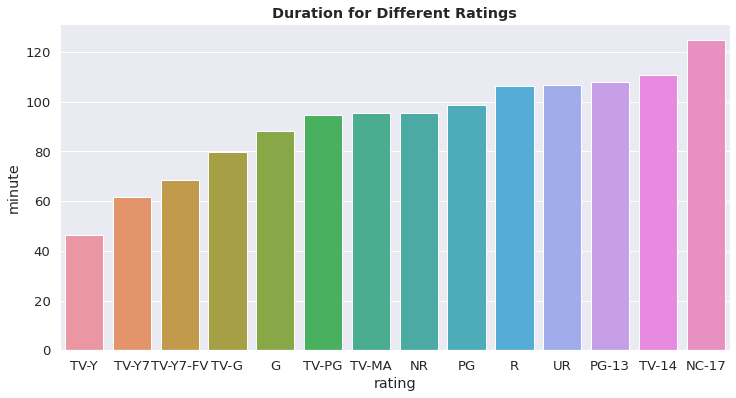

In [144]:
#Average duration of movie with respect to ratings
movies['minute'] = movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)
duration_year = movies.groupby(['rating'])['minute'].mean()
duration_df=pd.DataFrame(duration_year).sort_values('minute')
plt.figure(figsize=(12,6))
plt.title("Duration for Different Ratings",fontweight='bold')
sns.barplot(x=duration_df.index, y=duration_df.minute)
plt.show()

###**Understanding what type content is available in different countries**

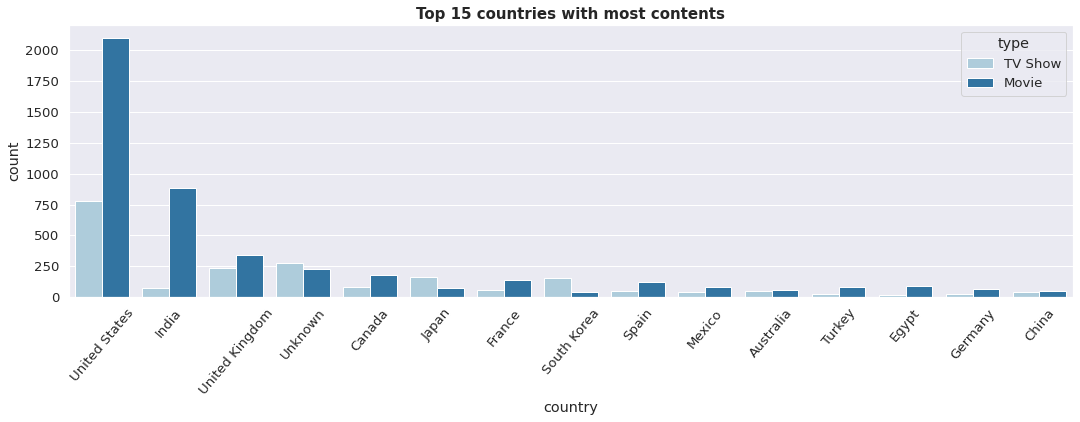

In [145]:
#Analysing top15 countries with most content 
plt.figure(figsize=(18,5))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:15],hue=df['type'],palette='Paired')
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

In [146]:
# Preparing data for heatmap
data=df[['country']].value_counts().sort_values(ascending=False).reset_index()[:11]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap.drop("Unknown",axis=1,inplace=True)
df_heatmap

country,Australia,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Adults,0.495327,0.467181,0.627551,0.259414,0.368644,0.764228,0.463918,0.797619,0.526042,0.489051
Kids,0.130841,0.150579,0.086735,0.015690,0.008475,0.016260,0.046392,0.035714,0.078125,0.074731
Older Kids,0.214953,0.220077,0.112245,0.163180,0.275424,0.089431,0.123711,0.053571,0.184028,0.196038
Teens,0.158879,0.162162,0.173469,0.561715,0.347458,0.130081,0.365979,0.113095,0.211806,0.240181


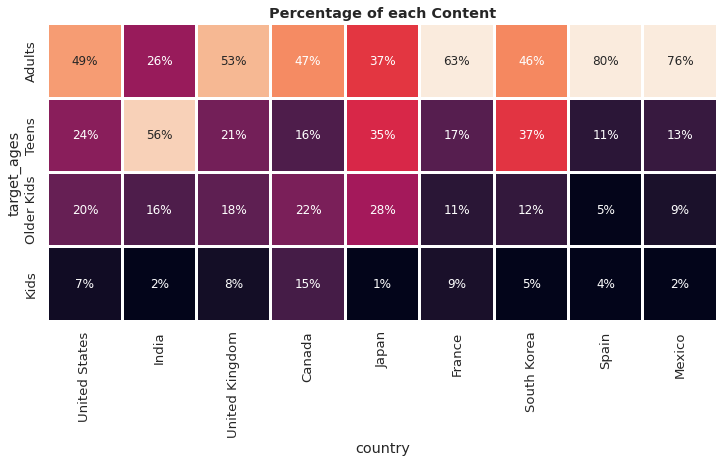

In [147]:
# Plotting the heatmap

plt.figure(figsize=(12, 12))

country_order = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
      'Mexico' ]

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']
plt.title("Percentage of each Content",fontweight='bold')
sns.heatmap(df_heatmap.loc[age_order,country_order],cmap="rocket",square=True, linewidth=2,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,annot_kws={"fontsize":12})
plt.show()

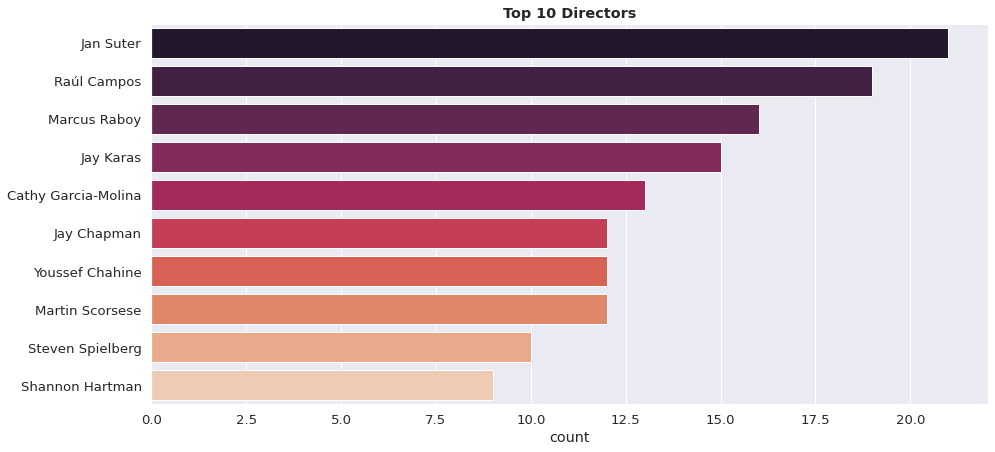

In [148]:
Top_directors = df[df['director'] != 'Unknown'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.title("Top 10 Directors",fontweight='bold')
sns.countplot(y = Top_directors, order=Top_directors.value_counts().index[:10], palette='rocket')
plt.show()

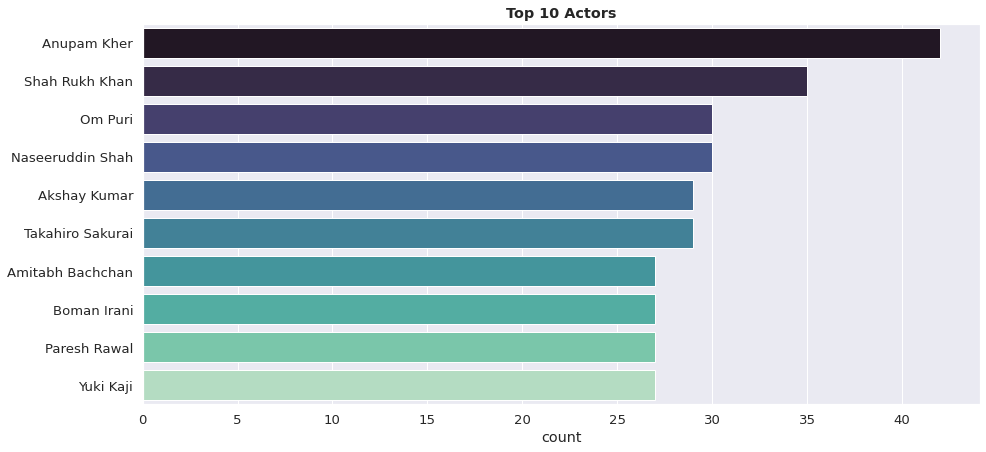

In [149]:
Top_actors = df[df['cast'] != 'Unknown'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.title("Top 10 Actors",fontweight='bold')
sns.countplot(y = Top_actors, order=Top_actors .value_counts().index[:10], palette='mako')
plt.show()

###**1. Hypothesis Testing:-** Is the mean length of Netflix movies 90 minutes? 
###   H0: Mean duration(m)=90 minutes
###   H1: Mean duration(m)!=90 minutes

In [150]:
#making a copy of movies dataframe 
hypothesis_df=movies.copy()
hypothesis_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,minute
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...,Adults,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow...",Adults,78
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",Teens,80
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,123
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,Horror Movies,"After an awful accident, a couple admitted to ...",Adults,95


In [151]:
# Extracting only digits from duration column using Regular expression
hypothesis_df['duration']= hypothesis_df['duration'].str.extract('(\d+)')
#Converting the string values to numerical format using pandas 'to_numeric' function
hypothesis_df['duration'] = pd.to_numeric(hypothesis_df['duration'])


In [152]:
#group_by duration and TYPE                 
group_by_df= hypothesis_df[['duration','type']].groupby(by='type')
#mean duration of Movies and Tv shows
group=group_by_df.mean().reset_index()
group

,type,duration
0,Movie,99.307978


In [153]:
#In A and B variable grouping Movies and Tv shows
A= group_by_df.get_group('Movie')
#mean and std
Mean = A['duration'].mean()
Std = A['duration'].std()

#Mean
print('Mean length of Movies is',Mean)
#Standard Deviation
print('Standard deviation of Movies',Std)


Mean length of Movies is 99.30797842663195
Standard deviation of Movies 28.53088078610757


In [154]:
#import stats 
from scipy import stats
#length of sample
n = len(A)
print('n=',n)
Dof=n-1
m=90
#tvalue
t_value = (Mean-m)/(Std/(np.sqrt(n)))
print('t-statistic value=',t_value)

n= 5377
t-statistic value= 23.922700720669887


### Two-Tailed Test

In [155]:
#t-distribution
#95% confidence interval
ts=stats.t.ppf(0.025,Dof)

In [156]:
#Confidence Interval
L1=(Mean-m)-ts*(Std/(np.sqrt(n)))
L2=(Mean-m)+ts*(Std/(np.sqrt(n)))
print("Confidence Interval=",(L2,L1))

Confidence Interval= (8.545212928481497, 10.070743924782398)


In [157]:
#P-value
from scipy.stats import t
pvalue=stats.t.sf(abs(t_value),Dof)*2
print('P-Value=',pvalue)

P-Value= 2.8291472375708075e-120


###Considering a significance level of α = 0.05, we would reject the null hypothesis of our hypothesis test because this p-value is less than 0.05.

###For a hypothesis test of whether the mean Netflix movie length is 90 minutes, we rejected the null hypothesis and concluded that there is evidence that the average movie length is not 90 minutes.